# Prediction on Tax Fraud

## Introduction:

In the audit field, identifying fraudulent companies is a key task in ensuring financial transparency and protecting stakeholder interests. One way to help auditors in this process is to develop a classification model that predicts the likelihood of corporate fraud based on current and historical risk factors. However, according to the experiment of Chang and his colleagues, audit risk models are considered to be theoretically ideal conceptual models. Previous audit risk models have been criticized as having low practical value because of the difficulty in quantifying risk factors and our inability to fully express their meaning using precise numbers or terms. (S.Chang et al,2008) The model is designed to automate the detection process and provide auditors with valuable insights to guide their decisions.

In fact, there are many other human factors that can affect audit risk. For example, from a management perspective, the client's management may exert influence on the auditor, according to Porcuna-Enguix et al. In addition, audit risk assessment implies that the auditor must ask questions of parties such as management. (Porcuna-Enguix et al,2021)

The project is conducted to help auditors identify companies that are predicted to be fraudulent by creating a classification model that can predict the presence of corporate fraud based on past risk factors. The data was obtained from one year of non-confidential data from companies collected by an Indian audit office from 2015 to 2016. And this research can be applied to many industries such as industry and agriculture. In addition, the study is authentic and multi-faceted: the combination of data in the dataset takes into account multiple aspects such as audit reports, environmental status reports, persistent problem reports, etc. 

## Method
We use 75% of the data as training data and the other 25% as test data

Using riskA-F, Sector_score, Money_Value, History, District_Loss, Inherent_Risk, CONTROL_RISK, Detection_Risk and Audit_Risk, standardize these parameters and then use them as predictor to build the prediction model.

Using the scatter plot to predict whether there is risk or not based on the relationship of money value against Inherent_Risk


## Expected outcomes and significance:


Our expected outcome is to find the relationship between risk factors and fraud and to develop a classification model that can predict potential fraudulent companies based on different risk factors.

This model will help the audit industry to predict fraudulent companies with high accuracy, improve audit efficiency, automate the audit process to save personnel time and effort, and serve as an early warning system for audits to minimize losses to stakeholders.

### Furthur Question:

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
audit_risk <- read_csv("https://raw.githubusercontent.com/Leoliuubc/dsci-100-project-group43/main/data/audit_risk.csv")
audit_risk

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5,⋯,0.4,0,0.2,0,2,1.456,0.4,0.5,0.2912,0
55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5,⋯,0.4,0,0.2,0,2,1.440,0.4,0.5,0.2880,0
55.57,15,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5,⋯,0.4,0,0.2,0,2,1.464,0.4,0.5,0.2928,0


In [4]:
risk_data <- audit_risk |>
                select(contains("Risk_"),Audit_Risk,Risk) 

risk_data_scaled <- risk_data |>
                    mutate(across(Risk_A:Audit_Risk, scale)) |>
                    mutate(Risk = as_factor(Risk))
                           
set.seed(581)

risk_data_split <- initial_split(risk_data_scaled, prop = 0.75, strata = Risk)  
risk_data_train <- training(risk_data_split)   
risk_data_test <- testing(risk_data_split)
risk_data_train
risk_data_test

Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Risk_F,Audit_Risk,Risk
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
-0.3926899,-0.1785002,-0.284628,-0.2020831,-0.4101527,-0.1752846,-0.1721694,0
-0.3630426,-0.2090926,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1773727,0
-0.3926899,-0.2100901,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1780555,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.2694501,-0.20643235,-0.284628,-0.20228327,2.3455051,-0.1752846,-0.1399149,1
-0.3926899,-0.04123348,-0.284628,-0.20463498,-0.4101527,-0.1752846,-0.1513457,1
-0.2694501,-0.18934052,-0.284628,0.03473947,-0.4101527,-0.1752846,-0.1227015,1


Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Risk_F,Audit_Risk,Risk
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
-0.2647995,-0.112061496,-0.284628,0.4679552,-0.4101527,-0.1752846,-0.02103468,1
0.5542802,0.004256066,-0.284628,-0.1846704,-0.4101527,-0.1752846,-0.12329111,1
2.2895201,0.590233215,-0.284628,-0.2019831,0.9676762,1.1326081,0.36863629,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.3403711,-0.1958580,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1749107,0
-0.3926899,-0.1447820,-0.284628,-0.2067866,-0.4101527,-0.1752846,-0.1678971,0
-0.3926899,-0.2106222,-0.284628,-0.2051854,-0.4101527,-0.1752846,-0.1778072,0


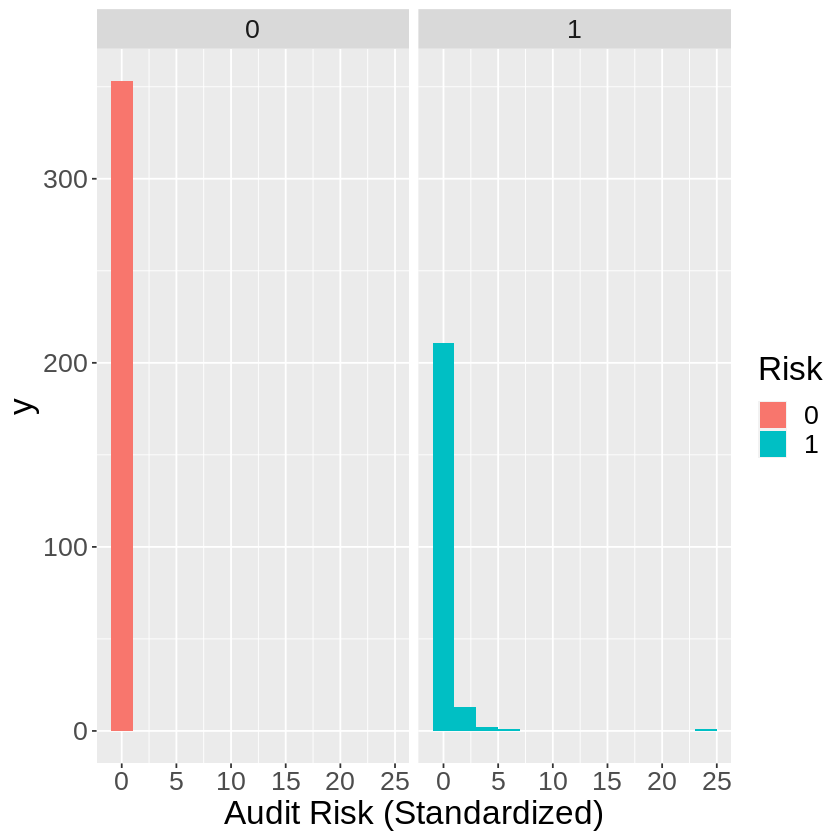

In [5]:
risk_plot <- risk_data_train |>
                ggplot(aes(x = Audit_Risk, fill = Risk)) +
                geom_histogram(stat = "bin", binwidth = 2) +
                labs(x = "Audit Risk (Standardized)", y = "y", fill = "Risk") +
                theme(text = element_text(size = 20)) +
                facet_grid(cols = vars(Risk))
risk_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9552583,5,0.006344445,Preprocessor1_Model01
1,roc_auc,binary,0.9484098,5,0.008270272,Preprocessor1_Model01
2,accuracy,binary,0.9552583,5,0.006344445,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
39,roc_auc,binary,0.9837004,5,0.005231472,Preprocessor1_Model39
40,accuracy,binary,0.9019398,5,0.013916303,Preprocessor1_Model40
40,roc_auc,binary,0.9838195,5,0.005049384,Preprocessor1_Model40


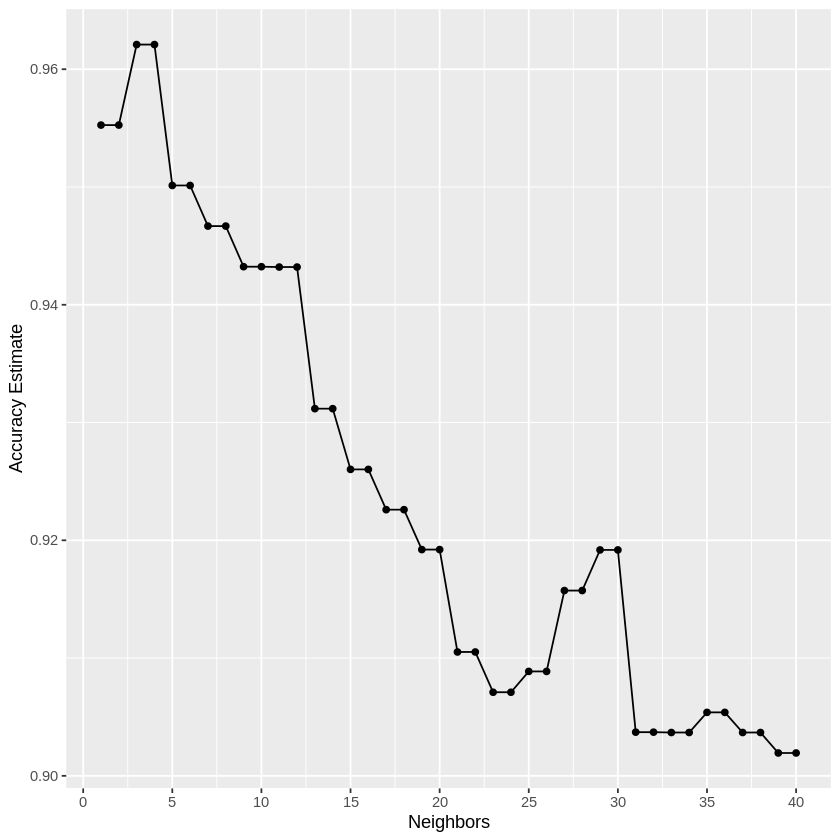

In [8]:
training_recipe <- recipe(Risk ~ ., data = risk_data_train)

training_vfold <- vfold_cv(risk_data_train, v = 5, strata = Risk)

training_mode <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |>
                    set_mode("classification")

cross_val <- workflow() |>
                add_recipe(training_recipe) |>
                add_model(training_mode) |>
                tune_grid(resamples = training_vfold, grid = tibble(neighbors = seq(from = 1, to = 40, by = 1))) |>
                collect_metrics()
cross_val

accuracies <- cross_val |> 
       filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 50, by = 5))
cross_val_plot

## Reference

Porcuna-Enguix, L., Bustos-Contell, E., Serrano-Madrid, J., & Labatut-Serer, G. (2021). Constructing the Audit Risk Assessment by the Audit Team Leader When Planning: Using Fuzzy Theory. Mathematics, 9(23), 3065. MDPI AG. Retrieved from http://dx.doi.org/10.3390/math9233065


Chang, S., Tsai, C., Shih, D., Hwang, C.,(2008). The development of audit detection risk assessment system: Using the fuzzy theory and audit risk model,Expert Systems with Applications,
ISSN 0957-4174, https://doi.org/10.1016/j.eswa.2007.08.057.